## Data Preprocessing Examples

 In this task, we will work on handling missing data as well as data standardisation and normalisation. Data can have missing values for a number of reasons, such as observations that were not collected or data corruption. We will discuss some general considerations for missing data, discuss how pandas chooses to represent it, and demonstrate some built-in pandas tools for handling missing data in Python.


In [1]:
import pandas as pd
import numpy as np

# Scaling modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures the same random data is used each time you execute the code
np.random.seed(0)


In [2]:
# Read in data
df = pd.read_csv('balance_missing.txt', sep=' ')

## Working with missing data
### Take a first look at the data
This should always be the first step during any analysis. Depending on data sources, missing data are identified differently. Pandas identifies missing values as NaN. However, missing values can appear as a question mark (?) or a zero (0) or minus one (-1) or a blank. So it is important to view and understand your data before anything else.

We are going to use the dataset `balance_missing.txt`. From the first five observations, we can see there are several missing values. They have been represented as NaN.

To start, let’s check the dimensions of the DataFrame to understand its size and then preview the first few rows to get a sense of the data.

In [3]:
# Return the number of rows and columns of the DataFrame
df.shape

(400, 11)

In [4]:
df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,NaN,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,NaN,6645,483.0,3.0,82.0,15.0,Female,NaN,Yes,Asian
2,22.5304088790893,104.593,7075,NaN,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,NaN,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


How many NaN values can you point out?

Now that we have seen that there are missing values, we need to get a sense of how many missing values exist in the whole dataset. We are going to find how many missing values we have in each column.


In [5]:
# Get the number of missing data values per column
missing_values_count = df.isnull().sum()

# Look at the number of missing values in the first ten columns
missing_values_count[0:10]

Balance       0
Income        6
Limit        15
Rating       11
Cards         1
Age          10
Education     6
Gender        8
Student       7
Married       3
dtype: int64

To better understand how much data is missing, we can calculate the percentage of all the missing values. If we get a very high percentage, we may be unable to use the data.


In [6]:
# Total number of missing values
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()

# Percent of data that is missing
(total_missing/total_cells) * 100


1.7727272727272727

Only 1.77% of the values are missing.

### Drop missing values

One option to deal with missing values is to remove any rows or columns that contain missing values. This strategy is not recommended for datasets with important data, sensitive data, or few observations. It's usually worth taking the time to go through your data and interrogate all the columns with missing values to get a proper understanding of your dataset.

If you're sure you want to drop rows with missing values, pandas has a handy function, `dropna()` to do this. Let's try it out on our data.

In [7]:
# Create a temporary DataFrame
temp_df = df

# Remove all the rows that contain a missing value.
temp_df.dropna().head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian
5,22.4861776123913,80.18,8047,569.0,4.0,77.0,10.0,Male,No,No,Caucasian
6,10.5745164367595,20.996,3388,259.0,2.0,37.0,12.0,Female,No,No,African American
7,14.5762043512884,71.408,7114,512.0,2.0,87.0,9.0,Male,No,No,Asian
8,7.93809029500252,15.125,3300,266.0,5.0,66.0,13.0,Female,No,No,Caucasian


As you can see, there are no longer NaN values in the first five observations as these have been dropped from the DataFrame. In fact, all observations with a NaN value in any of the columns have been dropped. Below you can see the number of rows has been reduced to 331 compared to 400 in the original dataset.

In [8]:
temp_df.dropna().shape

(331, 11)

The above procedure removed observations. Now let us look at removing columns.

In [9]:
# Create a temporary Dataframe
temp_df = df

# Remove all columns with at least one missing value
columns_with_na_dropped = temp_df.dropna(axis=1)
columns_with_na_dropped.head()

,Balance
0,12.2407984760474
1,23.2833339223376
2,22.5304088790893
3,27.652810710665
4,16.8939784904888


Looks like all the columns had at least one missing value except the "Balance" column. Losing all columns but one reduces the amount of data you have drastically. This is one of the reasons why removing observations or columns with missing data may not be a good solution. We'll explore other options next.

### Filling in missing values automatically

We can use the pandas `fillna()` function to fill in missing values in a dataframe. One option is to specify what we want the NaN values to be replaced with. Here, we can replace all NaN with 0.

In [10]:
# Create a temporary DataFrame
temp_df = df

# Replace all NA's with 0
temp_df.fillna(0).head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,0.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,0,6645,483.0,3.0,82.0,15.0,Female,0,Yes,Asian
2,22.5304088790893,104.593,7075,0.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,0,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


Another option is to replace the missing values with the values that come just before or just after it in the same column. This can be used in datasets where the observations are in some sorted or logical order.

In [11]:
# Create a temporary dataframe
temp_df = df

# Replace all NaN's with the value that comes directly after it in the same column,
# then replace all the remaining NaN's with 0

# Use bfill() method to fill NaN values with the next value in the column
temp_df = temp_df.bfill(axis=0)

# Then fill any remaining NaN values with 0
temp_df = temp_df.fillna(0)

temp_df.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,12.2407984760474,14.891,3606,283.0,2.0,82.0,11.0,Male,No,Yes,Caucasian
1,23.2833339223376,104.593,6645,483.0,3.0,82.0,15.0,Female,No,Yes,Asian
2,22.5304088790893,104.593,7075,681.0,4.0,71.0,11.0,Male,No,No,Asian
3,27.652810710665,148.924,9504,681.0,3.0,36.0,11.0,Male,No,No,Asian
4,16.8939784904888,55.882,4897,357.0,2.0,68.0,16.0,Male,No,Yes,Caucasian


### Feature Scaling Recap

Feature scaling is a technique used to transform the values of features so that they lie within a similar range or scale. This process is important in data preprocessing and analysis because it ensures that all features are comparable and contributes equally to subsequent analyses. The two main methods of feature scaling are **standardisation** and **normalisation**.

#### Standardisation vs. Normalisation: What’s the Difference?

Standardisation and normalisation both adjust the scale of features, but they do so in different ways:

- **Standardisation** (also known as Z-score normalisation) transforms the data to have a mean of 0 and a standard deviation of 1. This method centres the data distribution around zero and scales it to have a unit variance. Standardisation is useful when the data has different scales or when you want to bring features to a common scale while preserving the distribution’s shape. It is beneficial when dealing with data that might have outliers or different units of measurement.

- **Normalisation** (also known as Min-Max scaling) adjusts the data to fit within a specific range, typically between 0 and 1. This technique rescales the data based on the minimum and maximum values of each feature. Normalisation is useful when you need to ensure that all features contribute equally to the analysis, especially when the data has widely varying ranges or units. It is particularly helpful when features need to be bounded within a specific range for practical reasons, such as visualisation or integration with other systems.

#### When to Use Which Scaling Method:

- **Standardisation**:
  - Use when the features have different units or scales and you want to bring them to a common scale while maintaining their distribution properties.
  - Appropriate for data with outliers or varying distributions, as it is less sensitive to extreme values compared to normalisation.
  - Use when the data follows a Gaussian or Normal distribution.


- **Normalisation**:
  - Use when you need to scale features to a fixed range, such as [0, 1], to ensure that all features contribute equally to the analysis.
  - Ideal when features have different units or ranges, and you want to bound the data within a specific range for consistency.

In summary, **standardisation** adjusts data to have a mean of 0 and a standard deviation of 1, making it suitable for data with different scales and distributions. **Normalisation** scales data to a fixed range, typically [0, 1], ensuring that features are on a common scale without altering their distribution shape. For a deeper understanding of when to normalise or standardise data, you can refer to this **[article](https://www.secoda.co/learn/when-to-normalize-or-standardize-data)**.

---

#### Standarisation example

The code example below starts by generating 1000 random data points from a **[normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)** with a mean of 10 and a standard deviation of 5, reshaping this data into a **[column vector](https://www.statlect.com/matrix-algebra/vectors-and-matrices)**. It then creates a `StandardScaler` object for standardisation. The scaler is applied to the data, transforming it so that the values have a mean of 0 and a standard deviation of 1. The code then plots two histograms side by side: the first shows the distribution of the original data, while the second displays the distribution after standardisation.

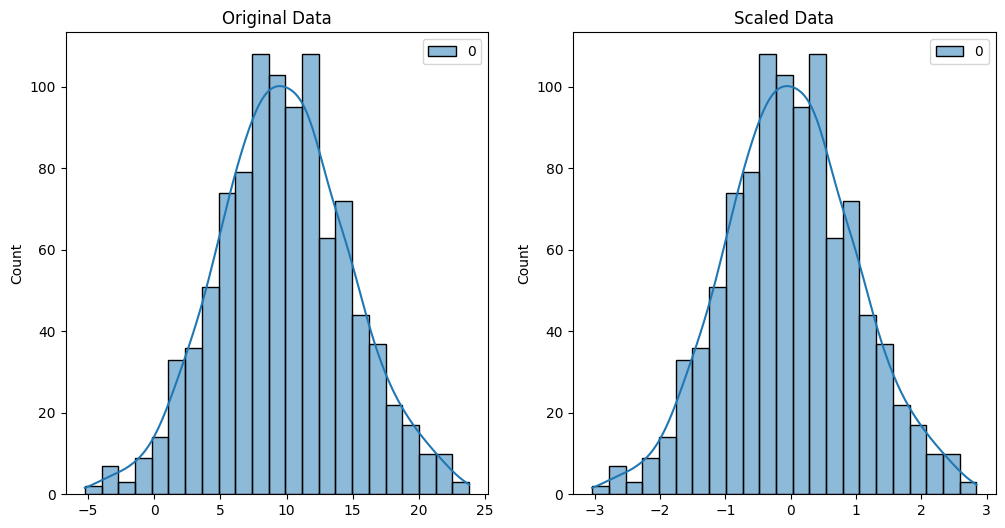

In [12]:
# Generate 1000 data points randomly drawn from a normal distribution
original_data = np.random.normal(loc=10, scale=5, size=1000).reshape(-1, 1)

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(original_data)

# Plot the original and scaled data to compare
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(original_data, ax=ax[0], kde=True)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Scaled Data")

plt.show()

Notice that the standardised data has a mean of 0.

#### Normalisation example

The code example below first generates 1000 random data points from an **[exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution)** and reshapes it into a **[column vector](https://www.statlect.com/matrix-algebra/vectors-and-matrices)**. It then creates an instance of `MinMaxScaler`, which is used to normalise the data. The scaler is fitted to the original data and subsequently transforms it, scaling the values to a range between 0 and 1. Finally, the code plots two histograms side by side: the first histogram shows the distribution of the original exponential data, while the second histogram displays the distribution of the data after normalisation.

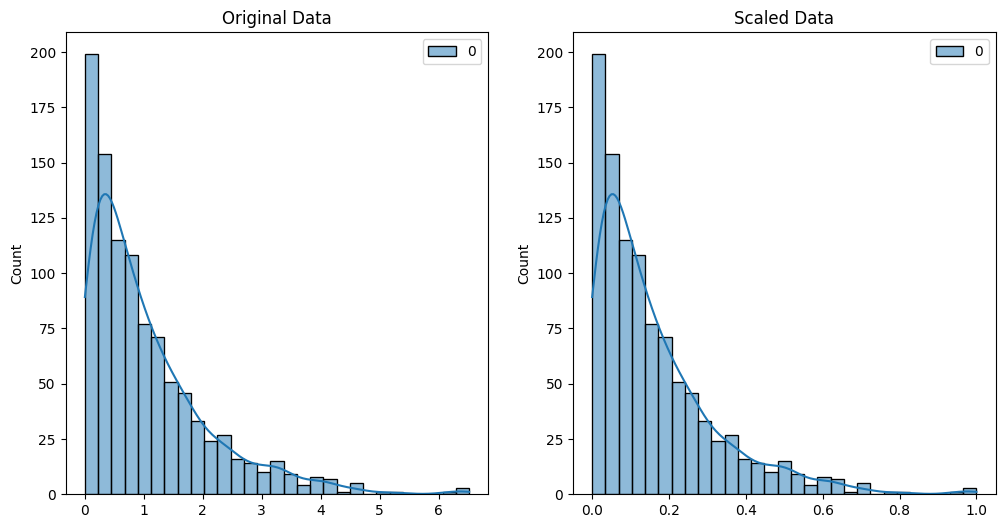

In [13]:
# Generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000).reshape(-1, 1)

# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(original_data)

# Plot the original and scaled data to compare
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(original_data, ax=ax[0], kde=True)
ax[0].set_title("Original Data")

sns.histplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title("Scaled Data")

plt.show()

Notice that, instead of ranging from 0 to 7, it now ranges from 0 to 1.

## Practice  

Practice handing missing data with the "countries.csv" dataset which is derived from some World Bank data. Each column is a type of indicator for example EN.ATM.CO2E.PC is carbon dioxide emissions in metric tons per capita. These indicators are recorded for participating countries.

In [14]:
# Load the countries data
countries = pd.read_csv("countries.csv")

countries.head()


,Country,Country Groups,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,FP.CPI.TOTL.ZG,IT.CEL.SETS.P2,IT.NET.USER.ZS,NE.EXP.GNFS.ZS,...,NY.GDP.PCAP.CD,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,SP.DYN.CDRT.IN,SP.DYN.IMRT.IN,SP.DYN.LE00.IN,SP.DYN.TFRT.IN,SP.POP.GROW,SP.URB.TOTL.IN.ZS
0,CEB,Central Europe and the Baltics,1.555790,100.000000,14.538355,6.820042,1.840965,122.192106,58.599297,52.333390,...,12567.128310,77.039930,189.578062,10.543330,11.429917,6.019183,75.295349,1.465325,-0.362710,62.059417
1,CSS,Caribbean small states,4.658176,93.114511,9.096342,9.277109,3.250344,113.628492,35.407690,44.935642,...,8726.326154,121.928584,200.568068,17.555646,7.436407,18.406085,72.252392,2.151960,0.642147,42.083135
2,EAP,East Asia & Pacific (excluding high income),3.796483,94.997330,16.471817,5.106045,3.789836,69.905604,28.957482,30.572597,...,4007.323783,91.717833,134.835195,14.439063,7.019396,19.100000,73.482345,1.843869,0.713160,47.696831
3,EAR,Early-demographic dividend,2.073571,79.455104,26.481427,2.119827,4.580200,68.069446,12.835425,27.711023,...,2926.483907,150.595639,214.978616,22.914627,7.028941,40.042149,67.955732,2.763140,1.534541,42.113134
4,EAS,East Asia & Pacific,2.930966,95.496185,13.729447,5.701783,3.247588,73.657018,34.269800,32.153225,...,7674.475705,86.702958,130.465277,13.880915,7.095146,18.136433,74.383915,1.797065,0.675231,51.791229


#### Visualise the IT.CEL.SETS.P2 feature

<Axes: xlabel='IT.CEL.SETS.P2', ylabel='Count'>

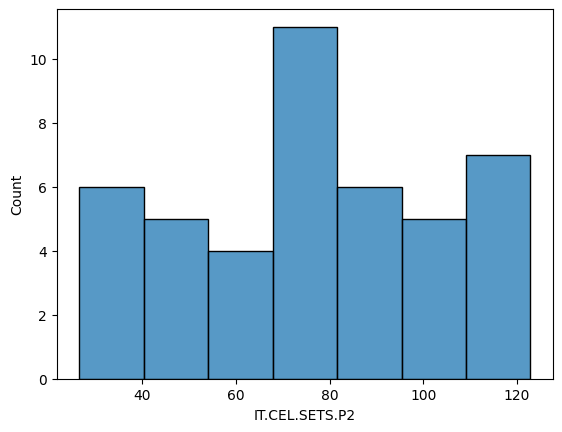

In [15]:
# IT.CEL.SETS.P2 is the mobile cellular subscriptions per 100 people.
sns.histplot(countries['IT.CEL.SETS.P2'])

#### Normalise the IT.CEL.SETS.P2 feature

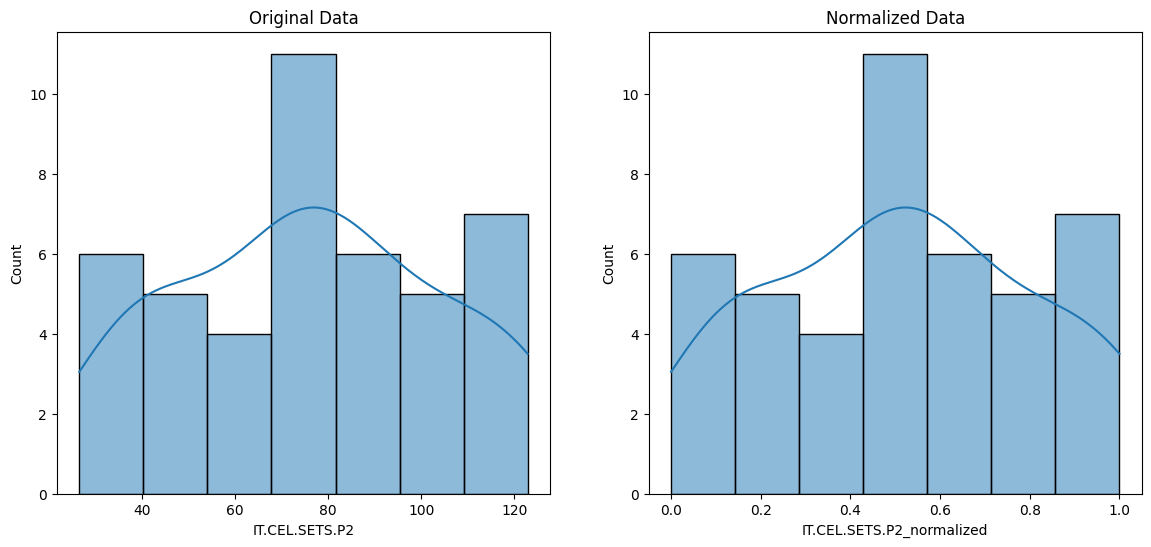

In [16]:
# Create the MinMaxScaler object
scaler = MinMaxScaler()

# Extract and reshape the data to be 2D
data_to_normalize = countries[['IT.CEL.SETS.P2']].values

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data_to_normalize)

# Assign the normalized data back to the DataFrame
countries['IT.CEL.SETS.P2_normalized'] = normalized_data

# Plot the original and normalized data to compare
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original Data
sns.histplot(countries['IT.CEL.SETS.P2'], ax=ax[0], kde=True)
ax[0].set_title("Original Data")

# Normalized Data
sns.histplot(countries['IT.CEL.SETS.P2_normalized'], ax=ax[1], kde=True)
ax[1].set_title("Normalized Data")

plt.show()


## Tasks


### Task 1

In [24]:
# 1. Read in store_income_data_task.csv

income_df = pd.read_csv('store_income_data_task.csv')

# 2. Display the first 5 observations

income_df.head()

,id,store_name,store_email,department,income,date_measured,country
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,4-2-2006,United States/
1,2,Nordson Corporation,NaN,Tools,$41744177.01,4-1-2006,Britain
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,12-9-2003,United States
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,8-5-2006,Britain/
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,21-1-1973,United Kingdom


In [25]:
# 3. Get the number of missing data values per column and print the results

missing_values_count = income_df.isnull().sum()

print(missing_values_count)

id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           35
dtype: int64


4. Write a note on why you think we have missing data for the following three columns: store_email,  department, and country. Remember to classify them according to the three categories(types of missingness) we analysed in the task.

**Answer here:**

Store email: MCAR Most likely due to the company not wanting to offer an email. Or them not actually having a generalized one.
Department: MAR, just because you can probably make an estimate of a department to fill the data with given the industry that the company is in. E.g. "Mellanox Technologies" is missing an entry, possibly due to an input error who knows, but we can say the department section probably won't be "Music" or "Beauty".
Country: MAR, perhaps they are global organistaions, or are not tethered to an individual area. But can be resolved with a Google search and filled in.

### Task 2

1. For the following example, decide whether standardisation or normalisation makes more sense.

  a. You want to build a **[linear regression model](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)** to predict someone's grades, given how much time they spend on various activities during a typical school week.  You notice that your measurements for how much time students spend studying aren't normally distributed: some students spend almost no time studying, while others study for four or more hours daily. Should you standardise or normalise this variable?  

  b. You're still working with your student's grades, but you want to include information on how students perform on several fitness tests as well. You have information on how many jumping jacks and push-ups each student can complete in a minute. However, you notice that students perform far more jumping jacks than push-ups: the average for the former is 40, and for the latter only 10. Should you standardise or normalise these variables?

**Answer here:**  

a. The data is non-Gaussian distributed, therefore the variable must be normalised. 

b. Normalise, They have the same scales but we need the scale features to be within the same range.

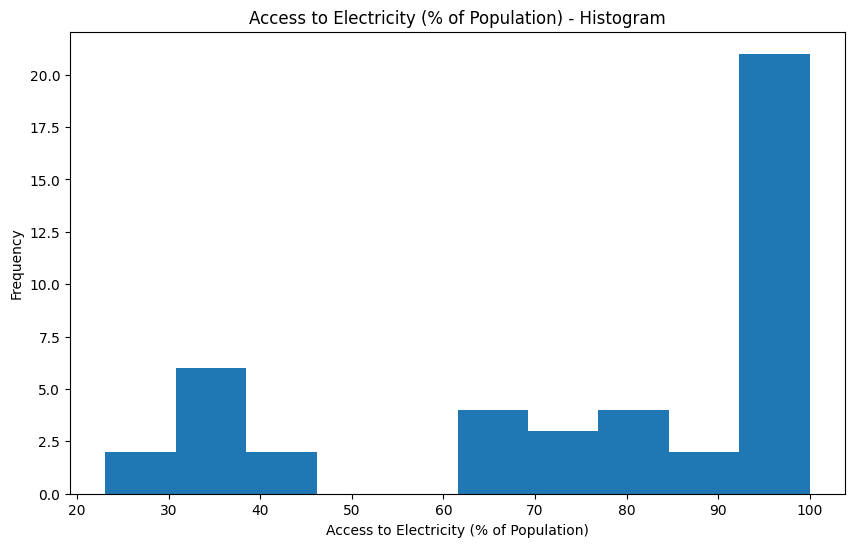

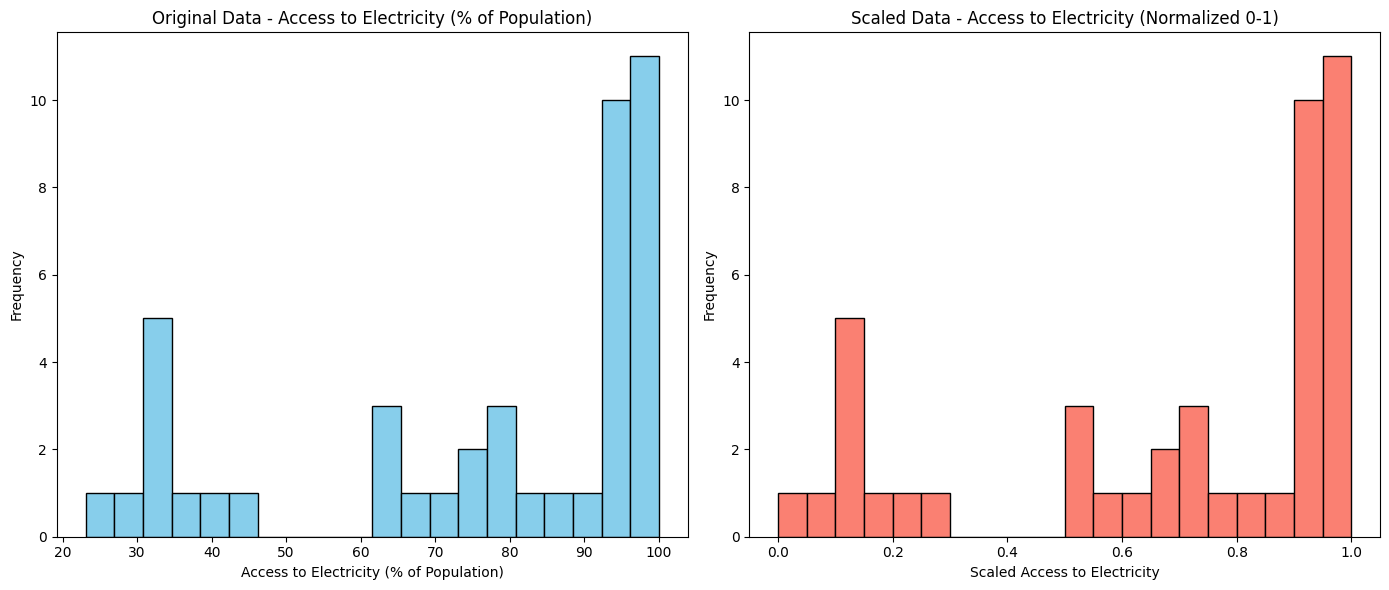

In [28]:
# 2. From the countries dataset, visualise the "EG.ELC.ACCS.ZS" column using a histogram.
#    Then, scale the column using the appropriate scaling method (normalisation or standardisaton).
#    Finally, visualise the original and scaled data alongside each other.
#    Note EG.ELC.ACCS.ZS is the percentage of the population with access to electricity.

countries_df = pd.read_csv('countries.csv')

plt.figure(figsize=(10, 6))
plt.hist(countries_df["EG.ELC.ACCS.ZS"].dropna(), )
plt.title("Access to Electricity (% of Population) - Histogram")
plt.xlabel("Access to Electricity (% of Population)")
plt.ylabel("Frequency")
plt.show()

# Select the column and drop any NaN values
data = countries_df['EG.ELC.ACCS.ZS'].dropna().values.reshape(-1, 1)

# Apply MinMaxScaler (Normalization) to scale data to a 0-1 range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Plot the original and scaled data side-by-side
plt.figure(figsize=(14, 6))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Original Data - Access to Electricity (% of Population)")
plt.xlabel("Access to Electricity (% of Population)")
plt.ylabel("Frequency")

# Scaled data histogram
plt.subplot(1, 2, 2)
plt.hist(scaled_data, bins=20, color='salmon', edgecolor='black')
plt.title("Scaled Data - Access to Electricity (Normalized 0-1)")
plt.xlabel("Scaled Access to Electricity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
